In [4]:
import numpy as np
import math
import itertools
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [147]:
class Node():

    def __init__(self, position = np.array([.0, .0]), mass = 1.0, velocity = np.array([.0, .0]), force = np.array([.0, .0])):
        self.position = position
        self.velocity = velocity
        self.force = force
        self.mass = mass

    def add_force(self, new_force):
        self.force += new_force
        

class SoftBody():
        
    def __init__(self, center = np.array([.0, .0]), radius = 2.0, vertices = 8):

        self.pressure_coeff = 1
        self.tension_coeff = 1
        self.g_coeff = 0.01
        self.center = center
        self.radius = radius
        self.vertices = vertices
        self.nodes=[]
        self.coordinates = []
        angle = 2 * math.pi / vertices

        for i in range(vertices):
            position = np.array([radius * math.cos(i * angle), radius * math.sin(i * angle)]) + self.center
            node = Node(position = position)
            self.nodes.append(node)
            self.coordinates.append(node.position)

        return

    def get_coordinates(self):
        
        for idx in range(self.vertices):
            self.coordinates[idx] = self.nodes[idx].position

        x, y = zip(*self.coordinates)
        
        return x, y

    def update_gravity(self):
        
        g_forces=[]
        for node in self.nodes:
            node.add_force(np.array([0, node.mass * -9.80665 * self.g_coeff]))
        return 

    def calc_area(self):

        
        area = abs(self.coordinates[1][0] * self.coordinates[0][1] 
            - self.coordinates[0][0] * self.coordinates[1][1])/2*self.vertices
           
        return area

    def update_pressure(self):
        
        start_area = math.pi * self.radius ** 2
        area = self.calc_area()
        p_forces =[]

        pressure = (start_area - area) * self.pressure_coeff

        for idx in range(self.vertices):
            
            c = self.coordinates[idx]
            #take neighbors coordinates in a and b
            a = self.coordinates[idx - 1]
            if idx + 1 == len(self.coordinates):
                b = self.coordinates[0]
            else:
                b = self.coordinates[idx + 1]
            
            p_force = np.array([c[0]/abs(c[0]) * (1 + ((b[0] - a[0]) / (a[1] - b[1])) ** 2) ** (-0.5), 
                c[0]/abs(c[0]) * (b[0] - a[0]) / (a[1] - b[1]) * ((1 + ((b[0] - a[0]) / (a[1] - b[1])) ** 2) ** (-0.5))]) * pressure
            
            self.nodes[idx].force = p_force + self.nodes[idx].force
            p_forces.append(p_force)
            
        return p_forces

    def update_tension(self):
        t_forces = []
        
        for idx in range(self.vertices):

            #take neighbors coordinates in l and r
            p = self.coordinates[idx]

            l = self.coordinates[idx - 1]
            if idx + 1 == len(self.coordinates):
                r = self.coordinates[0]
            else:
                r = self.coordinates[idx + 1]

            t_force = (np.array([l[0] - p[0], l[1] - p[1]]) + np.array([r[0] - p[0], r[1] - p[1]])) * self.tension_coeff

            self.nodes[idx].force = t_force + self.nodes[idx].force
            t_forces.append(t_force)

        return t_forces
    
    def collision_detection(self, collision_objects):
        return

    def update_velocity(self):
        
        time_interval = 1
        for node in self.nodes:
            node.velocity = node.velocity + node.force / node.mass * time_interval
        return
    
    def update_position(self):
        
        self.update_velocity()
        time_interval = 0.1
        for node in self.nodes:
            node.position = node.position + node.velocity * time_interval
            print(node.position)
        return

    def advance_state(self):
        
        
        return


In [148]:
b=SoftBody(vertices = 8)

<ipython-input-147-aa985f6d8af4>:77: RuntimeWarning: divide by zero encountered in double_scalars
  p_force = np.array([c[0]/abs(c[0]) * (1 + ((b[0] - a[0]) / (a[1] - b[1])) ** 2) ** (-0.5),
<ipython-input-147-aa985f6d8af4>:78: RuntimeWarning: divide by zero encountered in double_scalars
  c[0]/abs(c[0]) * (b[0] - a[0]) / (a[1] - b[1]) * ((1 + ((b[0] - a[0]) / (a[1] - b[1])) ** 2) ** (-0.5))]) * pressure
<ipython-input-147-aa985f6d8af4>:78: RuntimeWarning: invalid value encountered in double_scalars
  c[0]/abs(c[0]) * (b[0] - a[0]) / (a[1] - b[1]) * ((1 + ((b[0] - a[0]) / (a[1] - b[1])) ** 2) ** (-0.5))]) * pressure


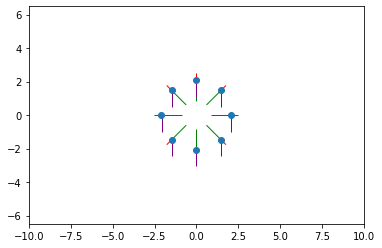

[ 2.02269157e+00 -1.40616719e-15]
[1.43025893 1.43025893]
[1.35622906e-16 2.02269157e+00]
[-1.43025893  1.43025893]
[-2.02269157e+00  3.63324423e-16]
[-1.43025893 -1.43025893]
[5.51532631e-17            nan]
[ 1.43025893 -1.43025893]


In [153]:
p_forces = []
for f, c in zip(b.update_pressure(), b.coordinates):
    p_forces.append(f + c)

lines =  list(zip(b.coordinates, p_forces))

p_lines = mc.LineCollection(lines, colors='red', linewidths=1)

t_forces = []
for f, c in zip(b.update_tension(), b.coordinates):
    t_forces.append(f + c)

lines =  list(zip(b.coordinates, t_forces))

t_lines = mc.LineCollection(lines, colors='green', linewidths=1)

#b.update_gravity()
g_forces = []
for c in b.coordinates:
    g_forces.append([0, -0.981] + c)
    
lines =  list(zip(b.coordinates, g_forces))

g_lines = mc.LineCollection(lines, colors='purple', linewidths=1)

fig, ax = plt.subplots()
ax.add_collection(p_lines)
ax.add_collection(t_lines)
ax.add_collection(g_lines)
x,y = b.get_coordinates()
ax.plot(x, y, 'o')
ax.axis('equal')
ax.axis([-10,10,-20,20])
plt.show()
b.update_position()

[ 2.89198164e+00 -5.96671875e-15]
[2.04493983 2.04493983]
[-1.23828854e-15  2.89198164e+00]
[-2.04493983  2.04493983]
[-2.89198164e+00 -3.40864197e-17]
[-2.04493983 -2.04493983]
[ 2.35411239e-15 -2.89198164e+00]
[ 2.04493983 -2.04493983]


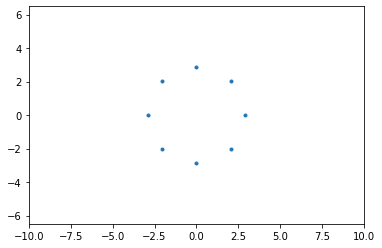

In [98]:
b.update_velocity()
b.update_position()
fig, ax = plt.subplots()
x,y = b.get_coordinates()
ax.plot(x, y, '.')
ax.axis('equal')
ax.axis([-10,10,-20,20])
plt.show()